## Calculate spatial relationships suing STRTree

In [1]:
## import libraries 
import geopandas as gpd 
from shapely import STRtree
from shapely.geometry import Point#
import geopandas as gpd


### Import data

In [2]:
#gdf of the features that need to be compared 
features = gpd.read_file('no_navigation.geojson') 

#gdf of the route that will be compared with the features 
route = gpd.read_file('test_route.geojson') 

In [3]:
type(features['tstamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
features['geometry'].map(lambda x: x if type(x) == 'shapely.geometry.point.Point')

SyntaxError: expected 'else' after 'if' expression (571984008.py, line 1)

In [5]:
features['geometry'].map(lambda x: x if type(x) == 'shapely.geometry.point.Point')

SyntaxError: expected 'else' after 'if' expression (571984008.py, line 1)

In [6]:
map(lambda x: x*2, filter(lambda x: x*2/6. != 1, range(5)))

In [7]:
features['geometry'].map(lambda x: print(type(x)))

<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geom

0       None
1       None
2       None
3       None
4       None
        ... 
3593    None
3594    None
3595    None
3596    None
3597    None
Name: geometry, Length: 3598, dtype: geometry

In [32]:
type(features)

geopandas.geodataframe.GeoDataFrame

In [22]:
type(Point())

shapely.geometry.point.Point

In [ ]:
map(lambda x: x*2, filter(lambda x: x*2/6. != 1, range(5)))

In [8]:
#Create STRTree of interest features
tree = STRtree(features['geometry'])

In [9]:
type(tree)

shapely.strtree.STRtree

In [10]:
tree

In [11]:
#Query data based on spatial relationship specified in predicate
print('intersects ->',tree.query(route['geometry'], predicate="intersects").tolist())
print('contains ->', tree.query(route['geometry'], predicate="contains").tolist())
print('touches ->',tree.query(route['geometry'], predicate="touches").tolist())
print('crosses ->', tree.query(route['geometry'], predicate="crosses").tolist())
print('overlaps ->',tree.query(route['geometry'], predicate="overlaps").tolist())

intersects -> [[0, 0, 0], [171, 170, 166]]
contains -> [[], []]
touches -> [[], []]
crosses -> [[0, 0, 0], [171, 170, 166]]
overlaps -> [[], []]


In [12]:
tree.query(route['geometry'], predicate="intersects").tolist()

[[0, 0, 0], [171, 170, 166]]

In [13]:
tree.query(route['geometry'], predicate="intersects")

array([[  0,   0,   0],
       [171, 170, 166]])

In [14]:
route2 = Point(1.37845, 50.06037)

In [15]:
tree.query(route2)

array([], dtype=int64)

In [16]:
tree = STRtree(features['geometry'])
tree

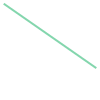

In [17]:
route['geometry'][0]

In [18]:
print(type(route['geometry']))

<class 'geopandas.geoseries.GeoSeries'>


In [19]:
route2 = Point(1.37845, 50.06037)

In [20]:
type(route2)

shapely.geometry.point.Point

In [21]:
tree = STRtree(route)

TypeError: Array should be one dimensional

In [22]:
route = gpd.GeoSeries(route)

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
type(route['geometry'])

geopandas.geoseries.GeoSeries